# European Swaption Pricing - All Models

Value a European Swaption using the Hull-White, Black-Derman-Toy and Black-Karasinski models. I analyse relationships to test the model pricing.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.utils import *
from financepy.products.rates import *
from financepy.market.curves import *
from financepy.models.hw_tree import HWTree
from financepy.models.bk_tree import BKTree
from financepy.models.bdt_tree import BDTTree

####################################################################
# FINANCEPY BETA Version 0.200 - This build:  14 Jul 2021 at 16:00 #
# **** NEW PEP8 COMPLIANT VERSION -- PLEASE UPDATE YOUR CODE  **** #
#      This software is distributed FREE & WITHOUT ANY WARRANTY    #
# For info and disclaimer - https://github.com/domokane/FinancePy  #
#      Send any bug reports or comments to quant@financepy.com     #
####################################################################



## Discount Curve

In [3]:
valuation_date = Date(1, 1, 2011)
settlement_date = valuation_date

Set up flat discount curve at 6% (semi-annual compounding)

In [4]:
libor_curve = DiscountCurveFlat(valuation_date, 0.0625, FrequencyTypes.SEMI_ANNUAL)

# Defining the Swaptions

We begin with European swaptions. European swaptions can be set up directly as European Swaptions or as Bermudan swaptions with an exercise type of EUROPEAN

In [5]:
exercise_date = settlement_date.add_tenor("1Y")
swapMaturityDate = settlement_date.add_tenor("4Y")

swapFixedCoupon = 0.060
swapFixedFrequencyType = FrequencyTypes.SEMI_ANNUAL
swapFixedDayCountType = DayCountTypes.ACT_365F
swapType = SwapTypes.PAY 

In [6]:
exercise_date

01-JAN-2012

In [7]:
swapMaturityDate

01-JAN-2015

In [8]:
swaptionPay = IborSwaption(settlement_date,
                               exercise_date,
                               swapMaturityDate,
                               SwapTypes.PAY ,
                               swapFixedCoupon,
                               swapFixedFrequencyType,
                               swapFixedDayCountType)

In [9]:
swaptionRec = IborSwaption(settlement_date,
                               exercise_date,
                               swapMaturityDate,
                               SwapTypes.RECEIVE,
                               swapFixedCoupon,
                               swapFixedFrequencyType,
                               swapFixedDayCountType)

## Valuation using Black's Model

Let's try the zero volatility limit first

In [10]:
model = Black(0.00001)

In [11]:
valuePay = swaptionPay.value(settlement_date, libor_curve, model)
valueRec = swaptionRec.value(settlement_date, libor_curve, model)
valuePayRec = valuePay - valueRec
print("PAY Value: %9.5f"% valuePay)
print("Recvr Value: %9.5f"% valueRec)
print("PayV - RecV: %9.5f"% valuePayRec)

PAY Value: 6193.31147
Recvr Value:   0.00000
PayV - RecV: 6193.31147


We can value the forward starting swap.

In [12]:
swap = IborSwap(exercise_date,
                    swapMaturityDate,
                    swapType,
                    swapFixedCoupon,
                    swapFixedFrequencyType,
                    swapFixedDayCountType)

In [13]:
swapValue = swap.value(settlement_date, libor_curve, libor_curve)
print("Swap Value: %9.5f"% swapValue)

Swap Value: 6193.31147


At zero volatility the PAY swaption is in the money and is just a forward starting swap so this makes sense.

Let's repeat with a non-zero volatility

In [14]:
model = Black(0.20)

In [15]:
valuePay = swaptionPay.value(settlement_date, libor_curve, model)
valueRec = swaptionRec.value(settlement_date, libor_curve, model)
valuePayRec = valuePay - valueRec
print("PAY Value: %9.5f"% valuePay)
print("Recvr Value: %9.5f"% valueRec)
print("PayV - RecV: %9.5f"% valuePayRec)

PAY Value: 15721.54222
Recvr Value: 9528.23076
PayV - RecV: 6193.31147


The swaption values have changed. Put call parity keeps the difference equal to the value of the forward starting swap.

We can also value the European option using other models. Let's try Black-Karasinski.

## Valuation using Shifted Black Model

In [18]:
model = BlackShifted(0.00001, 0.002)

In [19]:
valuePay = swaptionPay.value(settlement_date, libor_curve, model)
valueRec = swaptionRec.value(settlement_date, libor_curve, model)
valuePayRec = valuePay - valueRec
print("PAY Value: %9.5f"% valuePay)
print("Recvr Value: %9.5f"% valueRec)
print("PayV - RecV: %9.5f"% valuePayRec)

PAY Value: 6193.31147
Recvr Value:   0.00000
PayV - RecV: 6193.31147


In [22]:
model = BlackShifted(0.20, 0.002)

In [23]:
valuePay = swaptionPay.value(settlement_date, libor_curve, model)
valueRec = swaptionRec.value(settlement_date, libor_curve, model)
valuePayRec = valuePay - valueRec
print("PAY Value: %9.5f"% valuePay)
print("Recvr Value: %9.5f"% valueRec)
print("PayV - RecV: %9.5f"% valuePayRec)

PAY Value: 16118.33597
Recvr Value: 9925.02451
PayV - RecV: 6193.31147


Once again the model satisfies put-call parity.

## Valuation using Black-Karasinski

Start with the zero volatility limit

In [38]:
sigma = 0.000001
a = 0.01
num_time_steps = 200
model = BKTree(sigma, a, num_time_steps)

In [39]:
valuePay = swaptionPay.value(settlement_date, libor_curve, model)
valueRec = swaptionRec.value(settlement_date, libor_curve, model)
valuePayRec = valuePay - valueRec
print("PAY Value: %9.5f"% valuePay)
print("Recvr Value: %9.5f"% valueRec)
print("PayV - RecV: %9.5f"% valuePayRec)

PAY Value: 6347.52035
Recvr Value:   0.00000
PayV - RecV: 6347.52035


Only the PAY swaption is in the money and is worth the forward starting swap.

In [26]:
sigma = 0.20
a = 0.01
num_time_steps = 200
model = BKTree(sigma, a, num_time_steps)

In [27]:
valuePay = swaptionPay.value(settlement_date, libor_curve, model)
valueRec = swaptionRec.value(settlement_date, libor_curve, model)
valuePayRec = valuePay - valueRec
print("PAY Value: %9.5f"% valuePay)
print("Recvr Value: %9.5f"% valueRec)
print("PayV - RecV: %9.5f"% valuePayRec)

PAY Value: 15727.42906
Recvr Value: 9379.90877
PayV - RecV: 6347.52029


At 20% volatility the values are higher but put-call parity is obeyed.

## Valuation using Black-Derman-Toy

Check the zero volatility limit

In [28]:
sigma = 0.00001
num_time_steps = 200
model = BDTTree(sigma, num_time_steps)

In [29]:
valuePay = swaptionPay.value(settlement_date, libor_curve, model)
valueRec = swaptionRec.value(settlement_date, libor_curve, model)
valuePayRec = valuePay - valueRec
print("PAY Value: %9.5f"% valuePay)
print("Recvr Value: %9.5f"% valueRec)
print("PayV - RecV: %9.5f"% valuePayRec)

PAY Value: 6347.28920
Recvr Value:   0.00000
PayV - RecV: 6347.28920


Same result as before.

In [30]:
sigma = 0.20
num_time_steps = 200
model = BDTTree(sigma, num_time_steps)

In [31]:
valuePay = swaptionPay.value(settlement_date, libor_curve, model)
valueRec = swaptionRec.value(settlement_date, libor_curve, model)
valuePayRec = valuePay - valueRec
print("PAY Value: %9.5f"% valuePay)
print("Recvr Value: %9.5f"% valueRec)
print("PayV - RecV: %9.5f"% valuePayRec)

PAY Value: 15990.91739
Recvr Value: 9639.93743
PayV - RecV: 6350.97996


At 20% volatility the values are higher but put-call parity is obeyed.

## Valuation using Hull-White Model

We do the zero volatility limit first.

In [32]:
sigma = 0.0000001
a = 0.01
num_time_steps = 200
model = HWTree(sigma, a)

This is analytical as it uses Jamshidians method.

In [33]:
valuePay = swaptionPay.value(settlement_date, libor_curve, model)
valueRec = swaptionRec.value(settlement_date, libor_curve, model)
valuePayRec = valuePay - valueRec
print("PAY Value: %9.5f"% valuePay)
print("Recvr Value: %9.5f"% valueRec)
print("PayV - RecV: %9.5f"% valuePayRec)

PAY Value: 6348.45763
Recvr Value:   0.00000
PayV - RecV: 6348.45763


This is as expected.

In [34]:
sigma = 0.01
a = 0.01
num_time_steps = 200
model = HWTree(sigma, a)

In [35]:
valuePay = swaptionPay.value(settlement_date, libor_curve, model)
valueRec = swaptionRec.value(settlement_date, libor_curve, model)
valuePayRec = valuePay - valueRec
print("PAY Value: %9.5f"% valuePay)
print("Recvr Value: %9.5f"% valueRec)
print("PayV - RecV: %9.5f"% valuePayRec)

PAY Value: 13721.09708
Recvr Value: 7372.76925
PayV - RecV: 6348.32782


Once again put-call parity is obeyed.

# Tree Convergence Testing

## BK Model

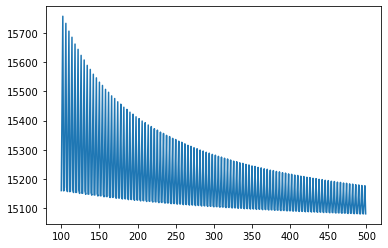

In [36]:
sigma = 0.2012
a = 0.04

timeSteps = range(100,500,1)
values = []
for num_time_steps in timeSteps:
    model = BKTree(sigma, a, num_time_steps)
    v = swaptionPay.value(valuation_date, libor_curve, model)
    values.append(v)

plt.plot(timeSteps, values);

Averaging even and odd values will improve convergence.

## BDT Model

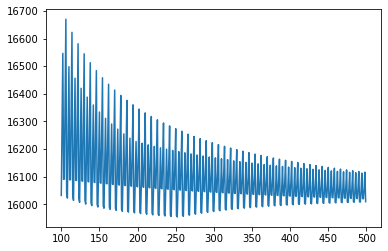

In [37]:
sigma = 0.2012

timeSteps = range(100,500,1)
values = []
for num_time_steps in timeSteps:
    model = BDTTree(sigma, num_time_steps)
    v = swaptionPay.value(settlement_date, libor_curve, model)
    values.append(v)
    
plt.plot(timeSteps, values);

Averaging even and odd values will improve convergence.

Copyright (c) 2020 Dominic O'Kane